In [57]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [58]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [59]:
# To generate pseudo-random numbers
np.random.seed(3)

X_CNN = np.empty([1000, 50, 50])
X_ANN = np.empty([1000, 2500])
y = np.empty([1000])
data_path = "/content/drive/My Drive/ANNCNN/ANNCNN/DS/"
for i in range(1000):
    dataset = pd.read_csv(data_path + 'data'+str(i)+'.csv')
    datasetNo_header = dataset.to_csv(header=None,index=False)
    X_CNN[i] = np.reshape(np.array((datasetNo_header.replace("[",'').replace("]","").replace('\n',"")).split()), (-1,50))
    X_ANN[i] = np.array((datasetNo_header.replace("[",'').replace("]","").replace('\n',"")).split())
    y[i] = np.array((dataset.columns[0].split(":"))[1])
    
# Spliting data into 80% for training & 20% for testing
X_train_CNN, X_test_CNN, X_train_ANN, X_test_ANN, y_train, y_test = train_test_split(X_CNN, X_ANN, y, test_size=0.2, random_state=32)

In [60]:
# Displaying shape of data
X_CNN.shape, X_ANN.shape, y.shape

((1000, 50, 50), (1000, 2500), (1000,))

In [61]:
# Displaying shape of training and testing data
X_train_CNN.shape, X_test_CNN.shape, X_train_ANN.shape, X_test_ANN.shape, y_train.shape, y_test.shape

((800, 50, 50), (200, 50, 50), (800, 2500), (200, 2500), (800,), (200,))

# Applying Feature  Scaling 


In [62]:
# It outputs maximum X value from X_CNN data
X_valuemax = np.amax(X_CNN)
# It oputputs maximum Y value from Y_CNN data
Y_valuemax = np.amax(y)
print(X_valuemax, Y_valuemax)

499.0 1981.0


In [63]:
# Coverting all the values in x and y training and testing dataset to range between 0 and 1 by dividing each 
# and every value by maximum value
X_train_CNN = X_train_CNN.astype('float32')/X_valuemax
X_test_CNN  = X_test_CNN.astype('float32')/X_valuemax
X_train_ANN = X_train_ANN.astype('float32')/X_valuemax
X_test_ANN  = X_test_ANN.astype('float32')/X_valuemax
y_train   = y_train.astype('float32')/Y_valuemax
y_test    = y_test.astype('float32')/Y_valuemax

# Designing Artifical Neural Network (ANN) Model

In [64]:
# Spliting data into 80% for training and 20% for testing 
X_trainANN, X_validationANN, y_trainANN, y_validationANN = train_test_split(X_train_ANN, y_train, test_size= 0.2, random_state=2025)

In [65]:
# Displaying the shape of training and validation data
X_trainANN.shape,  X_validationANN.shape, y_trainANN.shape,y_validationANN.shape

((640, 2500), (160, 2500), (640,), (160,))

In [66]:
# Create ANN model using keras
ANN_model = Sequential()
# Adding dense layer to model
ANN_model.add(Dense(16, input_dim=2500, kernel_initializer='normal', activation='relu'))
ANN_model.add(Dense(1, kernel_initializer='normal'))
# Compile model using adam optimizer
ANN_model.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
#fit the model by inputing traing and testing data to the network
ANN_model.fit(X_trainANN, y_trainANN, epochs = 100, batch_size=64, validation_data=(X_validationANN, y_validationANN))

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 0s 170us/step - loss: 0.1224 - val_loss: 0.0177
Epoch 2/100
640/640 [==============================] - 0s 63us/step - loss: 0.0136 - val_loss: 0.0110
Epoch 3/100
640/640 [==============================] - 0s 60us/step - loss: 0.0113 - val_loss: 0.0087
Epoch 4/100
640/640 [==============================] - 0s 60us/step - loss: 0.0095 - val_loss: 0.0080
Epoch 5/100
640/640 [==============================] - 0s 64us/step - loss: 0.0089 - val_loss: 0.0078
Epoch 6/100
640/640 [==============================] - 0s 70us/step - loss: 0.0086 - val_loss: 0.0077
Epoch 7/100
640/640 [==============================] - 0s 66us/step - loss: 0.0085 - val_loss: 0.0074
Epoch 8/100
640/640 [==============================] - 0s 66us/step - loss: 0.0080 - val_loss: 0.0078
Epoch 9/100
640/640 [==============================] - 0s 67us/step - loss: 0.0078 - val_loss: 0.0070
Epoch 10/100
640/640 [=============

In [68]:
# saving the ANN model
ANN_model.save('1116540-ANN.h5')

# Designing CNN Model

In [69]:
# It displays the demension of CNN training and testing datasets
X_train_CNN.ndim, X_test_CNN.ndim

(3, 3)

In [70]:
# Expanding the 3-dimension to 4-dimension array
X_train_CNN = np.expand_dims(X_train_CNN, -1)
X_test_CNN = np.expand_dims(X_test_CNN, -1)

In [71]:
# It displays the dimension of CNN datasets
X_train_CNN.ndim, X_test_CNN.ndim

(4, 4)

In [72]:
#Spliting the data into training and validation
X_train_CNN, X_validation_CNN, y_train_CNN, y_validation_CNN = train_test_split(X_train_CNN, y_train, test_size= 0.2, random_state=2025)

In [73]:
#Displays the shape of training and validation data
X_train_CNN.shape,  X_validation_CNN.shape, y_train_CNN.shape, y_validation_CNN.shape

((640, 50, 50, 1), (160, 50, 50, 1), (640,), (160,))

In [74]:
# Creatinging CNN model using keras 
CNN_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[50,50,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=1, activation='linear')
])

In [75]:
CNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               4718720   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 4,719,489
Trainable params: 4,719,489
Non-trainable params: 0
_________________________________________________________________


In [76]:
# complieing the cnn model using adam optimizer
CNN_model.compile(loss='mean_squared_error', optimizer='adam')

In [77]:
# fit the model using training and testing data
CNN_model.fit(X_train_CNN, y_train_CNN, epochs=80, batch_size=256, verbose=1, validation_data=(X_validation_CNN, y_validation_CNN))

Train on 640 samples, validate on 160 samples
Epoch 1/80
640/640 [==============================] - 0s 375us/step - loss: 35.0270 - val_loss: 3.1114
Epoch 2/80
640/640 [==============================] - 0s 197us/step - loss: 2.1642 - val_loss: 0.7740
Epoch 3/80
640/640 [==============================] - 0s 188us/step - loss: 0.7667 - val_loss: 0.7741
Epoch 4/80
640/640 [==============================] - 0s 179us/step - loss: 0.7667 - val_loss: 0.7736
Epoch 5/80
640/640 [==============================] - 0s 177us/step - loss: 0.6177 - val_loss: 0.1955
Epoch 6/80
640/640 [==============================] - 0s 162us/step - loss: 0.0982 - val_loss: 0.0352
Epoch 7/80
640/640 [==============================] - 0s 160us/step - loss: 0.0952 - val_loss: 0.1897
Epoch 8/80
640/640 [==============================] - 0s 169us/step - loss: 0.1655 - val_loss: 0.0547
Epoch 9/80
640/640 [==============================] - 0s 160us/step - loss: 0.0298 - val_loss: 0.0099
Epoch 10/80
640/640 [==============

In [78]:
# saving the CNN model
CNN_model.save('1116540-CNN.h5')

# Load the models to display predictive performance

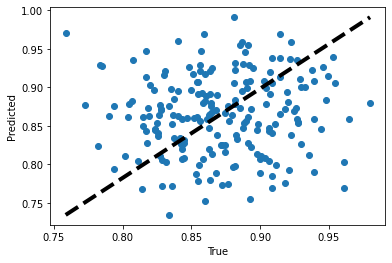

In [79]:
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

load_ANN_model = load_model('1116540-ANN.h5')
# Predictive ANN
predict_ANN = load_ANN_model.predict(X_test_ANN)
figure, axis = plt.subplots()
#plots the graph for true vs predicted
axis.scatter(y_test, predict_ANN)
axis.plot([y_test.min(), y_test.max()], [predict_ANN.min(), predict_ANN.max()], 'k--', lw=4)
axis.set_xlabel('True')
axis.set_ylabel('Predicted')
plt.show()

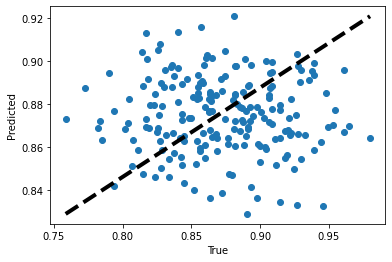

In [80]:
load_CNN_model = load_model('1116540-CNN.h5')

# Predict CNN
predict_CNN = load_CNN_model.predict(X_test_CNN)
figure, axis = plt.subplots()
# Plots the graph for true v/s predicted 
axis.scatter(y_test, predict_CNN)
axis.plot([y_test.min(), y_test.max()], [predict_CNN.min(), predict_CNN.max()], 'k--', lw=4)
axis.set_xlabel('True')
axis.set_ylabel('Predicted')
plt.show()

In [81]:
from sklearn import metrics

# Mean Square Error error performance metric.  
MSE = metrics.mean_squared_error(predict_ANN, predict_CNN)
print("Mean Square Error: ",MSE)

# Root Mean Square Error error metric
RMSE = np.sqrt(metrics.mean_squared_error(predict_ANN, predict_CNN))
print("Root Mean Square Error: ",RMSE)

# Mean Absolute Error metric
MAE = metrics.mean_absolute_error(predict_ANN, predict_CNN)
print("Mean Absolute Error: ",MAE)

Mean Square Error:  0.0027286115
Root Mean Square Error:  0.052236114
Mean Absolute Error:  0.042520467


# Performance Metrics for ANN Model

In [82]:

from sklearn import metrics
# Calculating the performance metric for ANN model
# Mean Square Error error performance metric.  
MSE = metrics.mean_squared_error(y_test, predict_ANN)
print("Mean Square Error: ",MSE)

# Root Mean Square Error error metric
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predict_ANN))
print("Root Mean Square Error: ",RMSE)

# Mean Absolute Error metric
MAE = metrics.mean_absolute_error(y_test, predict_ANN)
print("Mean Absolute Error: ",MAE)


Mean Square Error:  0.004305512
Root Mean Square Error:  0.0656164
Mean Absolute Error:  0.052201148


# Perfomance Metrics for CNN Model

In [83]:
from sklearn import metrics

# Comparing the prediction performance of ANN and CNN using performance metrics

# Mean Square Error error performance metric.  
MSE = metrics.mean_squared_error(y_test, predict_CNN)
print("Mean Square Error: ",MSE)

# Root Mean Square Error error metric
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predict_CNN))
print("Root Mean Square Error: ",RMSE)

# Mean Absolute Error metric
MAE = metrics.mean_absolute_error(y_test, predict_CNN)
print("Mean Absolute Error: ",MAE)

Mean Square Error:  0.0022369714
Root Mean Square Error:  0.047296632
Mean Absolute Error:  0.038754657


By comparing both models performance metrics, CNN model is very efficient than ANN model because it resulting less mean square error, root mean square error and mean absolute error than ANN model.

In [84]:
#Comparsion of both models predictive performance
#By comparing both models performance metrics, CNN model is very efficient than ANN model
# because it resulting less mean square error, root mean square error and mean absolute error than ANN model.
